# Variational API quickstart

see: http://docs.pymc.io/notebooks/variational_api_quickstart.html

## Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import pymc3 as pm
import theano
import numpy as np

np.random.seed(42)
pm.set_tt_rng(42)

In [21]:
w = pm.floatX([.2, .8])
mu = pm.floatX([-.3, .5])
sd = pm.floatX([.1, .1])

with pm.Model() as model:
    x = pm.NormalMixture('x', w=w, mu=mu, sd=sd, dtype=theano.config.floatX)
    x2 = x ** 2
    sin_x = pm.math.sin(x)

In [22]:
mu, sd, x, x2, sin_x

(array([-0.3,  0.5]),
 array([0.1, 0.1]),
 x,
 Elemwise{pow,no_inplace}.0,
 Elemwise{sin,no_inplace}.0)

In [23]:
with model:
    pm.Deterministic('x2', x2)
    pm.Deterministic('sin_x', sin_x)

In [24]:
with model:
    trace = pm.sample(50000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 50500/50500 [00:25<00:00, 2000.40it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d4cff98>,
      dtype=object)

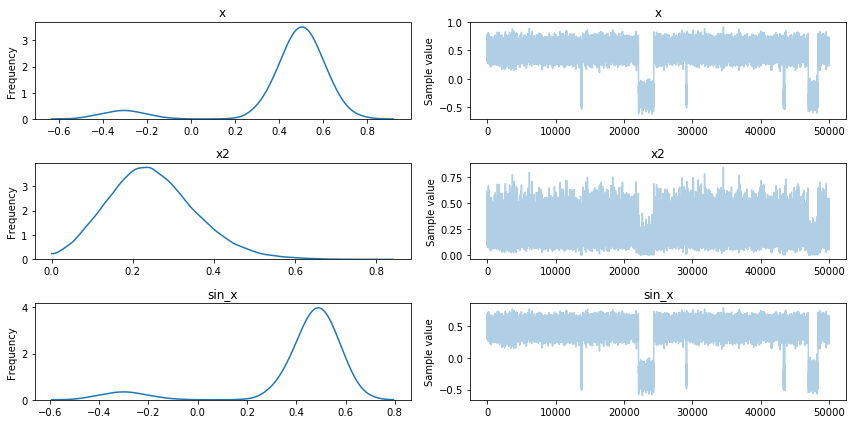

In [25]:
pm.traceplot(trace)

In [26]:
help(pm.NormalMixture)

Help on class NormalMixture in module pymc3.distributions.mixture:

class NormalMixture(Mixture)
 |  Normal mixture log-likelihood
 |  
 |  .. math::
 |  
 |      f(x \mid w, \mu, \sigma^2) = \sum_{i = 1}^n w_i N(x \mid \mu_i, \sigma^2_i)
 |  
 |  ========  =======================================
 |  Support   :math:`x \in \mathbb{R}`
 |  Mean      :math:`\sum_{i = 1}^n w_i \mu_i`
 |  Variance  :math:`\sum_{i = 1}^n w_i^2 \sigma^2_i`
 |  ========  =======================================
 |  
 |  Parameters
 |  ----------
 |  w : array of floats
 |      w >= 0 and w <= 1
 |      the mixture weights
 |  mu : array of floats
 |      the component means
 |  sd : array of floats
 |      the component standard deviations
 |  tau : array of floats
 |      the component precisions
 |  
 |  Method resolution order:
 |      NormalMixture
 |      Mixture
 |      pymc3.distributions.distribution.Distribution
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, w, mu, *arg

In [27]:
with model:
    mean_field = pm.fit(method='advi')

Average Loss = 2.2413: 100%|██████████| 10000/10000 [00:01<00:00, 7056.94it/s]
Finished [100%]: Average Loss = 2.2687


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f7795f8>,
      dtype=object)

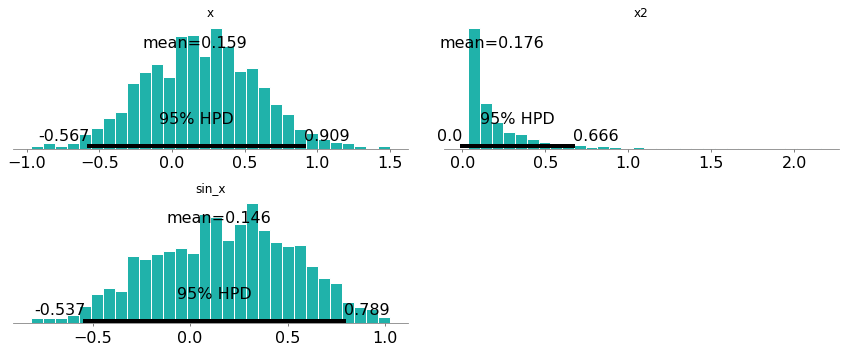

In [28]:
pm.plot_posterior(mean_field.sample(1000), color='LightSeaGreen')